# Loan Status Prediction

Author : Prasad Patharvat

# Problem Statement
We have a banking dataset which have two csv files names training & testing set which is extracted from kaggle website. so now we have to predict the loan status of that data by using differnt algorithms including machine learning & deep learning.

# Algoritm used :
Logistic regression

Decision Tree

Random forest

Adaboost Classifier

Artificial Neural Network

# Import Libraries

In [1]:
# Import the required Libraries.

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Dataset, Visualize & Analysis

In [2]:
Loan_Train = pd.read_csv("C:Desktop/Data Sets/training_set.csv")

In [3]:
#Loan_Train.head()
#Loan_Train.tail()
Loan_Train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
331,LP002098,Male,No,0,Graduate,No,2935.0,0.0,98.0,360.0,1.0,Semiurban,Y
545,LP002767,Male,Yes,0,Graduate,No,2768.0,1950.0,155.0,360.0,1.0,Rural,Y
546,LP002768,Male,No,0,Not Graduate,No,3358.0,0.0,80.0,36.0,1.0,Semiurban,N
160,LP001560,Male,Yes,0,Not Graduate,No,1863.0,1041.0,98.0,360.0,1.0,Semiurban,Y
505,LP002622,Male,Yes,2,Graduate,No,3510.0,4416.0,243.0,360.0,1.0,Rural,Y


In [4]:
Loan_Train.shape

(614, 13)

In [5]:
Loan_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
Loan_Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Loan_Train = Loan_Train.drop(["Loan_ID"],axis=1)

# Missing Data Treatment

In [8]:
Loan_Train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
def replacer(df):
    import pandas as pd 
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)

        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [10]:
replacer(Loan_Train)

In [11]:
Loan_Train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis  (EDA)

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    
    cat = []
    con = []
    
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else: 
            con.append(i)
            
    for i in df[con]:
        sb.boxplot(df[i],color="r")
        plt.show()
        
        sb.distplot(df[i],color="b")
        plt.show()
        
        sb.scatterplot(df[i],Loan_Train.LoanAmount)
        plt.show()
        
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl",hue = Loan_Train.Loan_Status)
        sb.boxplot(Loan_Train[i],Loan_Train.LoanAmount,hue = Loan_Train.Loan_Status)
        plt.show()

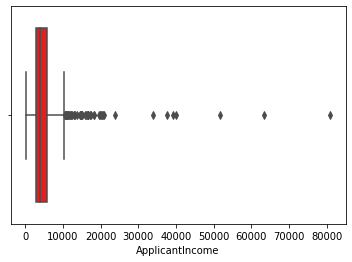

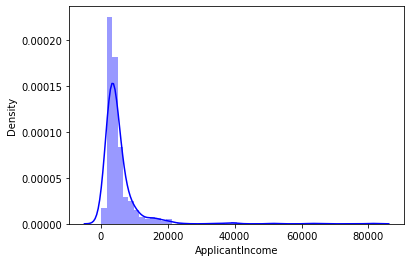

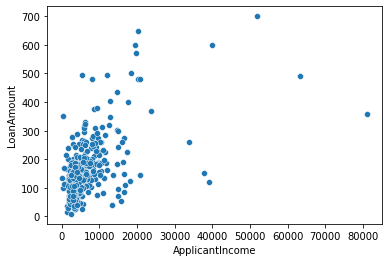

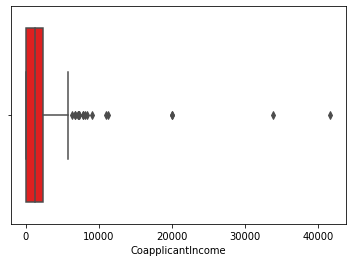

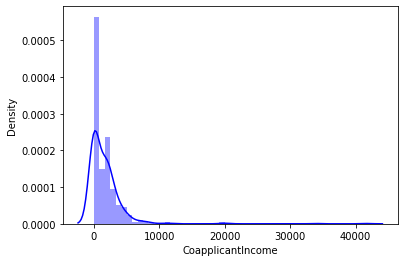

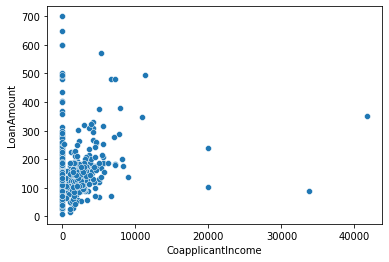

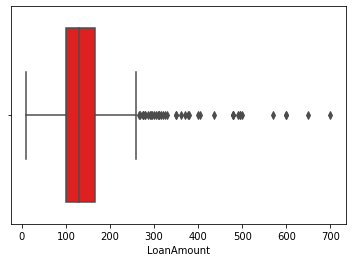

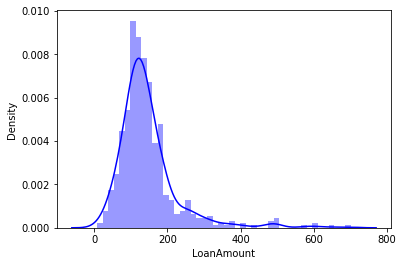

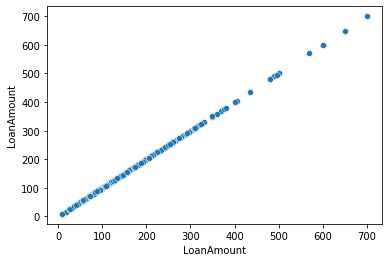

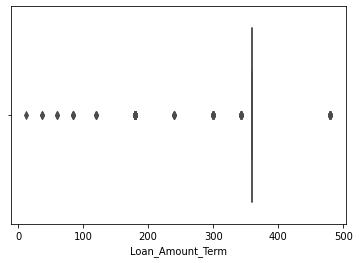

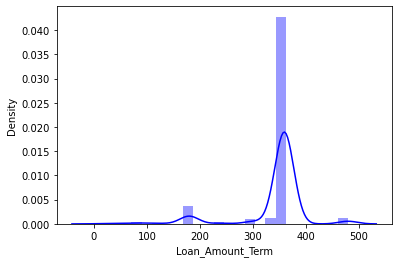

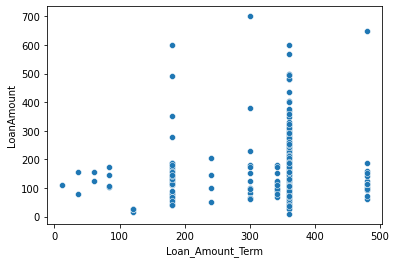

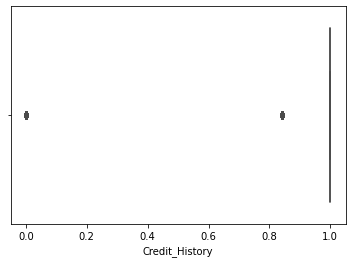

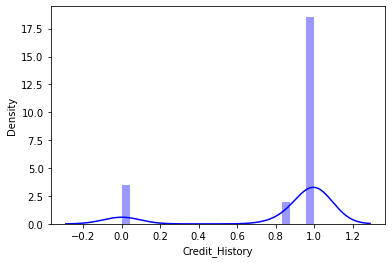

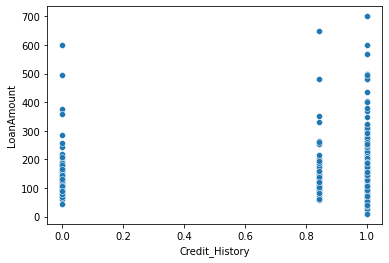

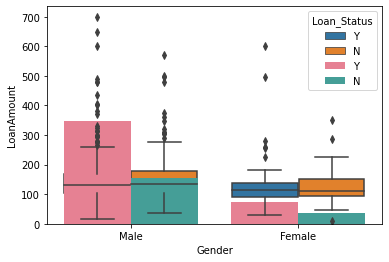

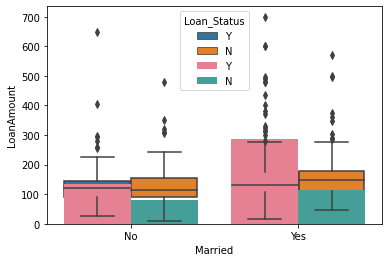

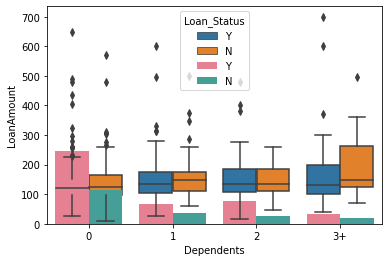

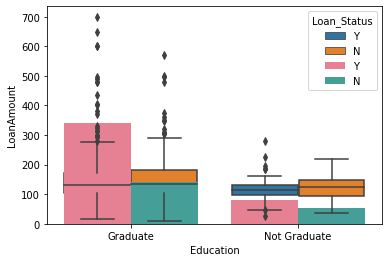

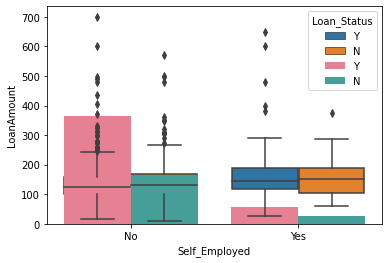

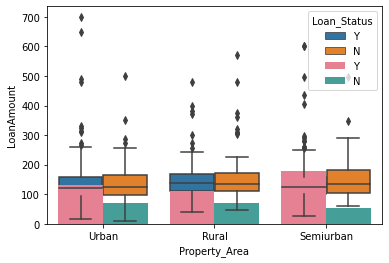

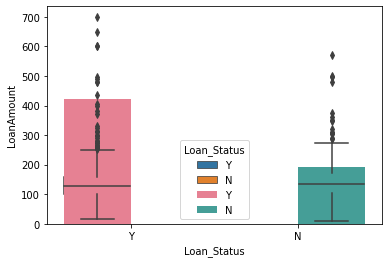

In [13]:
EDA(Loan_Train)

In [14]:
# ANOVA test for checking important categorical features
cat = []
con = []

for i in Loan_Train.columns:
    if(Loan_Train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_cat_cols = []
for i in cat:
    pval = ANOVA(Loan_Train,i,"LoanAmount")
    print("LoanAmount vs ",i,ANOVA(Loan_Train,i,"LoanAmount"))
    if(pval < 0.05):
        imp_cat_cols.append(i)

LoanAmount vs  Gender 0.0074
LoanAmount vs  Married 0.0003
LoanAmount vs  Dependents 0.0001
LoanAmount vs  Education 0.0
LoanAmount vs  Self_Employed 0.0042
LoanAmount vs  Property_Area 0.5255
LoanAmount vs  Loan_Status 0.3677


# Define X and Y

In [15]:
X = Loan_Train.drop(["Loan_Status"],axis=1)
Y = Loan_Train[["Loan_Status"]]

In [16]:
Y_Original = Y[["Loan_Status"]]

In [17]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [19]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Data Preprocessing
Using one hot encoding (OHE) for categorical columns and
Standardscaler for continous columns

In [20]:
def preprocessing(df):
    
    import pandas as pd 
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
            
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns = con)
    X3 = X2.join(X1)
    return X3

In [21]:
Xnew = preprocessing(X)

In [22]:
#Xnew.head()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

In [24]:
#Y.head()

# Outlier Treatment

In [25]:
Outlier_treatment = Xnew.join(Y)

In [26]:
Outlier_treatment.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.072651,-0.554368,0.000000,0.279851,0.45164,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,0.000000,-0.038610,-0.219273,0.279851,0.45164,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,-0.462412,0.252103,-0.314547,0.279851,0.45164,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,0.097389,-0.554368,-0.064454,0.279851,0.45164,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1


In [27]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [28]:
outliers = outliers(Outlier_treatment)

In [29]:
Outlier_treatment = Outlier_treatment.drop(outliers)

In [30]:
Outlier_treatment

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.072651,-0.554368,0.000000,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851,0.451640,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
610,-0.212902,-0.554368,-1.267279,-2.518655,0.451640,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
611,0.436842,-0.472284,1.269371,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
612,0.356730,-0.554368,0.483367,0.279851,0.451640,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1


In [31]:
Xnew = Outlier_treatment.drop(labels= [("Loan_Status")],axis=1)

In [32]:
Xnew.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,0.001877,0.880726,1.436099,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,-0.503369,-0.035874,-0.612275,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,-0.388198,0.302037,0.138001,0.279851,-2.410441,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,-0.229285,-0.032453,0.257093,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
10,-0.361330,-0.314958,-0.910004,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [33]:
Y = Outlier_treatment[["Loan_Status"]]

In [34]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Divide Data in Training and Tessting Set

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Logistic Regression Model

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

In [37]:
pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc_log_reg = accuracy_score(ytrain,pred_tr)
ts_acc_log_reg = accuracy_score(ytest,pred_ts)

print("training_accuracy_log_reg :--->",tr_acc_log_reg)
print("testing_accuracy_log_reg :--->",ts_acc_log_reg)

training_accuracy_log_reg :---> 0.8112798264642083
testing_accuracy_log_reg :---> 0.8362068965517241


In [39]:
confusion_matrix(ytrain,pred_tr)

array([[ 65,  79],
       [  8, 309]], dtype=int64)

In [40]:
confusion_matrix(ytest,pred_ts)

array([[17, 18],
       [ 1, 80]], dtype=int64)

# Create Decision Tress Classifer Model

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. The model confidence score is the highest among models evaluated so far.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model_dtc = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc = accuracy_score(ytrain,predtr1)
ts_acc_dtc = accuracy_score(ytest,predts1)

print("training_accuracy_DTC :--->",tr_acc_dtc)
print("testing_accuracy_DTC :--->",ts_acc_dtc)

training_accuracy_DTC :---> 1.0
testing_accuracy_DTC :---> 0.6810344827586207


# Decision Tree Model has good training accuracy but bad in testing accuracy - model is overfitted

In [42]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)

cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 25}

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=25)
model1 = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

print("training_accuracy_DTC :--->", tr_acc_dtc)
print("testing_accuracy_DTC :--->", ts_acc_dtc)

training_accuracy_DTC :---> 1.0
testing_accuracy_DTC :---> 0.6810344827586207


In [44]:
from sklearn.model_selection import GridSearchCV
tg = {"min_sample_split":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)

cvmodel = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 25}

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=50)
model1 = dtc.fit(xtrain,ytrain)

predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

print("training_accuracy_DTC :--->", tr_acc_dtc)
print("testing_accuracy_DTC :--->", ts_acc_dtc)

training_accuracy_DTC :---> 1.0
testing_accuracy_DTC :---> 0.6810344827586207


# Create Random Forest classifier model

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. The model confidence score is the highest among models evaluated so far.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21)
model_rfc = rfc.fit(xtrain,ytrain)

predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_rfc = accuracy_score(ytrain,predtr2)
ts_acc_rfc = accuracy_score(ytest,predts2)

print("training_accuracy_RFC :--->", tr_acc_rfc)
print("testing_accuracy_RFC :--->", ts_acc_rfc)

training_accuracy_RFC :---> 1.0
testing_accuracy_RFC :---> 0.8103448275862069


# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted


In [47]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)

cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 87}

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=87,random_state = 21)
model_rfc = rfc.fit(xtrain,ytrain)

predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_rfc = accuracy_score(ytrain,predtr2)
ts_acc_rfc = accuracy_score(ytest,predts2)

print("training_accuracy_RFC :--->", tr_acc_rfc)
print("testing_accuracy_RFC :--->", ts_acc_rfc)

training_accuracy_RFC :---> 1.0
testing_accuracy_RFC :---> 0.8017241379310345


# Create Adaboost Model

AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called Decision Stumps

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model_abc = abc.fit(xtrain,ytrain)

predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
ts_acc_abc = accuracy_score(ytest,predts3)

print("training_accuracy_ABC :", tr_acc_abc)
print("testing_accuracy_ABC :", ts_acc_abc)

training_accuracy_ABC : 1.0
testing_accuracy_ABC : 0.7068965517241379


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted


In [50]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))

cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 57}

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21),n_estimators=67)
model_abc = abc.fit(xtrain,ytrain)

predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
tr_acc_abc = accuracy_score(ytest,predts3)

print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 0.7155172413793104
testing_accuracy_abc : 0.7068965517241379


# Create Neural Network

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

In [64]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

nn = Sequential()

# Input Layer
nn.add(Dense(32,activation="relu",input_dim = xtrain.shape[1])) 

# Hidden Layer
nn.add(Dense(32,activation="relu"))

# Output Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer

nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=250)

Epoch 1/250
15/15 [==============================] - 2s 31ms/step - loss: 0.7077 - accuracy: 0.4989 - val_loss: 0.6481 - val_accuracy: 0.7069
Epoch 2/250
15/15 [==============================] - 0s 13ms/step - loss: 0.6048 - accuracy: 0.7657 - val_loss: 0.5841 - val_accuracy: 0.7759
Epoch 3/250
15/15 [==============================] - 0s 19ms/step - loss: 0.5525 - accuracy: 0.7961 - val_loss: 0.5414 - val_accuracy: 0.7931
Epoch 4/250
15/15 [==============================] - 0s 15ms/step - loss: 0.5165 - accuracy: 0.8134 - val_loss: 0.5092 - val_accuracy: 0.8276
Epoch 5/250
15/15 [==============================] - 0s 21ms/step - loss: 0.4891 - accuracy: 0.8156 - val_loss: 0.4837 - val_accuracy: 0.8276
Epoch 6/250
15/15 [==============================] - 0s 15ms/step - loss: 0.4687 - accuracy: 0.8156 - val_loss: 0.4687 - val_accuracy: 0.8276
Epoch 7/250
15/15 [==============================] - 0s 20ms/step - loss: 0.4543 - accuracy: 0.8134 - val_loss: 0.4588 - val_accuracy: 0.8276
Epoch 

Epoch 53/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3614 - accuracy: 0.8460 - val_loss: 0.5732 - val_accuracy: 0.7586
Epoch 54/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3587 - accuracy: 0.8525 - val_loss: 0.5703 - val_accuracy: 0.7759
Epoch 55/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3577 - accuracy: 0.8460 - val_loss: 0.5814 - val_accuracy: 0.7500
Epoch 56/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3557 - accuracy: 0.8503 - val_loss: 0.5864 - val_accuracy: 0.7500
Epoch 57/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3546 - accuracy: 0.8503 - val_loss: 0.5902 - val_accuracy: 0.7500
Epoch 58/250
15/15 [==============================] - 0s 15ms/step - loss: 0.3549 - accuracy: 0.8503 - val_loss: 0.5923 - val_accuracy: 0.7500
Epoch 59/250
15/15 [==============================] - 0s 8ms/step - loss: 0.3504 - accuracy: 0.8655 - val_loss: 0.5871 - val_accuracy: 0.7672
Epoch

15/15 [==============================] - 0s 9ms/step - loss: 0.2301 - accuracy: 0.9067 - val_loss: 0.9119 - val_accuracy: 0.6983
Epoch 168/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2282 - accuracy: 0.9067 - val_loss: 0.8988 - val_accuracy: 0.7414
Epoch 169/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.9046 - val_loss: 0.9140 - val_accuracy: 0.7328
Epoch 170/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2276 - accuracy: 0.9132 - val_loss: 0.9174 - val_accuracy: 0.6983
Epoch 171/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.9132 - val_loss: 0.9169 - val_accuracy: 0.6983
Epoch 172/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2224 - accuracy: 0.9089 - val_loss: 0.9388 - val_accuracy: 0.6897
Epoch 173/250
15/15 [==============================] - 0s 8ms/step - loss: 0.2259 - accuracy: 0.9111 - val_loss: 0.9061 - val_accuracy: 0.7845
Epoch 174/250

# Keras Tunner for overcome overfitting Condition

In [65]:
import keras_tuner as kt

In [66]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(200,input_dim=(Xnew.shape[1])))
    nn.add(Dropout(0.1))
    y = hp.Choice("units",values=[64,128,256,512])
    nn.add(Dense(units=y))
    x = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=x))
    nn.add(Dense(20))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [69]:
tuner = kt.Hyperband(model_builder,
                     objective="val_accuracy",
                     max_epochs=200,
                     directory="D:/ETL/NN_loan",
                     project_name="NN_Loan_tuner")

In [70]:
tuner.search(xtrain,ytrain,epochs=30,validation_split=0.2)

Trial 35 Complete [00h 00m 04s]
val_accuracy: 0.774193525314331

Best val_accuracy So Far: 0.7956989407539368
Total elapsed time: 00h 02m 30s
INFO:tensorflow:Oracle triggered exit


In [73]:
best = tuner.get_best_hyperparameters(num_trials=13)[0]

In [74]:
best.get("rate")    #Hyperparameter for Dropout

0.2

In [75]:
best.get("units")   #Hyperparameter for hidden layer Size

512

In [76]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

nn = Sequential()

# Input Layer
nn.add(Dense(512,activation="relu",input_dim = xtrain.shape[1])) 
nn.add(Dropout(0.2))

# Hidden Layer
nn.add(Dense(32,activation="relu"))
nn.add(Dropout(0.2))

# Output Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer

nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=250)

Epoch 1/250
15/15 [==============================] - 3s 51ms/step - loss: 0.5702 - accuracy: 0.7354 - val_loss: 0.4656 - val_accuracy: 0.8362
Epoch 2/250
15/15 [==============================] - 0s 17ms/step - loss: 0.4649 - accuracy: 0.8091 - val_loss: 0.4471 - val_accuracy: 0.8362
Epoch 3/250
15/15 [==============================] - 0s 14ms/step - loss: 0.4551 - accuracy: 0.8156 - val_loss: 0.4468 - val_accuracy: 0.8362
Epoch 4/250
15/15 [==============================] - 0s 20ms/step - loss: 0.4456 - accuracy: 0.8026 - val_loss: 0.4545 - val_accuracy: 0.8190
Epoch 5/250
15/15 [==============================] - 0s 17ms/step - loss: 0.4404 - accuracy: 0.8113 - val_loss: 0.4725 - val_accuracy: 0.8103
Epoch 6/250
15/15 [==============================] - 0s 24ms/step - loss: 0.4333 - accuracy: 0.8134 - val_loss: 0.4735 - val_accuracy: 0.8017
Epoch 7/250
15/15 [==============================] - 0s 27ms/step - loss: 0.4310 - accuracy: 0.8221 - val_loss: 0.4828 - val_accuracy: 0.8017
Epoch 

15/15 [==============================] - 0s 15ms/step - loss: 0.1243 - accuracy: 0.9501 - val_loss: 1.5846 - val_accuracy: 0.6983
Epoch 116/250
15/15 [==============================] - 0s 17ms/step - loss: 0.1294 - accuracy: 0.9436 - val_loss: 1.5439 - val_accuracy: 0.6897
Epoch 117/250
15/15 [==============================] - 0s 12ms/step - loss: 0.1416 - accuracy: 0.9328 - val_loss: 1.5797 - val_accuracy: 0.7328
Epoch 118/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1216 - accuracy: 0.9436 - val_loss: 1.5873 - val_accuracy: 0.7414
Epoch 119/250
15/15 [==============================] - 0s 12ms/step - loss: 0.1563 - accuracy: 0.9328 - val_loss: 1.5929 - val_accuracy: 0.7069
Epoch 120/250
15/15 [==============================] - 0s 12ms/step - loss: 0.1475 - accuracy: 0.9393 - val_loss: 1.5369 - val_accuracy: 0.6983
Epoch 121/250
15/15 [==============================] - 0s 12ms/step - loss: 0.1346 - accuracy: 0.9414 - val_loss: 1.5224 - val_accuracy: 0.7586
Epoch 

Epoch 172/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1054 - accuracy: 0.9544 - val_loss: 2.0538 - val_accuracy: 0.6983
Epoch 173/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1162 - accuracy: 0.9458 - val_loss: 2.0643 - val_accuracy: 0.6466
Epoch 174/250
15/15 [==============================] - 0s 13ms/step - loss: 0.0923 - accuracy: 0.9588 - val_loss: 2.0755 - val_accuracy: 0.6983
Epoch 175/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1173 - accuracy: 0.9566 - val_loss: 2.0132 - val_accuracy: 0.6983
Epoch 176/250
15/15 [==============================] - 0s 13ms/step - loss: 0.0986 - accuracy: 0.9588 - val_loss: 2.0785 - val_accuracy: 0.6983
Epoch 177/250
15/15 [==============================] - 0s 13ms/step - loss: 0.0999 - accuracy: 0.9544 - val_loss: 2.1104 - val_accuracy: 0.7241
Epoch 178/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1122 - accuracy: 0.9501 - val_loss: 2.0946 - val_accuracy:

Epoch 229/250
15/15 [==============================] - 0s 13ms/step - loss: 0.0796 - accuracy: 0.9675 - val_loss: 2.7044 - val_accuracy: 0.6466
Epoch 230/250
15/15 [==============================] - 0s 13ms/step - loss: 0.0818 - accuracy: 0.9653 - val_loss: 2.8023 - val_accuracy: 0.6379
Epoch 231/250
15/15 [==============================] - 0s 14ms/step - loss: 0.0833 - accuracy: 0.9588 - val_loss: 2.7435 - val_accuracy: 0.6724
Epoch 232/250
15/15 [==============================] - 0s 12ms/step - loss: 0.0757 - accuracy: 0.9653 - val_loss: 2.6583 - val_accuracy: 0.6983
Epoch 233/250
15/15 [==============================] - 0s 13ms/step - loss: 0.1167 - accuracy: 0.9610 - val_loss: 2.9214 - val_accuracy: 0.6379
Epoch 234/250
15/15 [==============================] - 0s 14ms/step - loss: 0.0859 - accuracy: 0.9631 - val_loss: 2.7324 - val_accuracy: 0.6983
Epoch 235/250
15/15 [==============================] - 0s 15ms/step - loss: 0.0819 - accuracy: 0.9675 - val_loss: 2.7015 - val_accuracy:

# Prapare Dataset for Test Data

In [77]:
test_data = pd.read_csv("C:Desktop/Data Sets/testing_set.csv")

In [78]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [79]:
test = test_data.drop(["Loan_ID"],axis=1)

In [80]:
#checking for missing values in data set
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [81]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [83]:
# replace missing values, 
#if missing value is categorical then is mode 
#for continous use mean value

replacer(test)

In [84]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Data Preprocessing on test Data set

In [85]:
def preprocessing(df):
    import pandas as pd
    
    cat = []
    con = []
    
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            
        else:
            con.append(i)
    
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    
    return X3       

In [86]:
xtest = preprocessing(test)

In [88]:
xtest.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.479180,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.479180,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.479180,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.479180,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
5,-0.538459,0.794673,0.260707,0.270603,0.479180,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
6,-0.526020,-0.673335,-1.267316,0.270603,0.479180,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
7,-0.188540,-0.673335,0.178555,0.270603,-2.265952,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
8,1.800044,-0.673335,2.363793,-1.588932,0.479180,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
9,-0.490539,0.356244,-0.215773,0.270603,0.479180,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0


# 1). Logistic Regression Model for Prediction

In [89]:
pred_test_data = le.inverse_transform(model_log_reg.predict(xtest))

In [98]:
prediction = test_data[["Loan_ID"]]

In [99]:
prediction ["Loan_Status_log_reg"] = pred_test_data

In [100]:
prediction

,Loan_ID,Loan_Status_log_reg
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2). Decision Tree model for prediction

In [95]:
pred_decisiontree = le.inverse_transform(model_dtc.predict(xtest))

In [101]:
prediction['Loan_Status_DecisionTree'] = pred_decisiontree

In [102]:
prediction

,Loan_ID,Loan_Status_log_reg,Loan_Status_DecisionTree
0,LP001015,Y,Y
1,LP001022,Y,Y
2,LP001031,Y,Y
3,LP001035,Y,Y
4,LP001051,Y,Y
...,...,...,...
362,LP002971,Y,Y
363,LP002975,Y,N
364,LP002980,Y,Y
365,LP002986,Y,N


# 3). Random Forest model for prediction

In [103]:
pred_randomforest = le.inverse_transform(model_rfc.predict(xtest))

In [104]:
prediction['LoanStatus_RandomForest'] = pred_randomforest

In [105]:
prediction

,Loan_ID,Loan_Status_log_reg,Loan_Status_DecisionTree,LoanStatus_RandomForest
0,LP001015,Y,Y,Y
1,LP001022,Y,Y,Y
2,LP001031,Y,Y,Y
3,LP001035,Y,Y,Y
4,LP001051,Y,Y,N
...,...,...,...,...
362,LP002971,Y,Y,Y
363,LP002975,Y,N,Y
364,LP002980,Y,Y,Y
365,LP002986,Y,N,N


# 4) Adaboost model for prediction

In [106]:
pred_adaboost = le.inverse_transform(model_abc.predict(xtest))

In [107]:
prediction['LoanStatus_Adaboost'] = pred_adaboost

In [109]:
prediction

,Loan_ID,Loan_Status_log_reg,Loan_Status_DecisionTree,LoanStatus_RandomForest,LoanStatus_Adaboost
0,LP001015,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y
4,LP001051,Y,Y,N,Y
...,...,...,...,...,...
362,LP002971,Y,Y,Y,Y
363,LP002975,Y,N,Y,N
364,LP002980,Y,Y,Y,N
365,LP002986,Y,N,N,N


# 5) Neural Network model for prediction

In [110]:
pred_NN = nn.predict(xtest)

In [111]:
Q = []
for i in pred_NN:
    if(i[0] < 0.05):
        Q.append(0)
    else:
        Q.append(1)

In [112]:
pred = le.inverse_transform(Q)

In [113]:
prediction['LoanStatus_NN'] = pred

In [114]:
prediction

,Loan_ID,Loan_Status_log_reg,Loan_Status_DecisionTree,LoanStatus_RandomForest,LoanStatus_Adaboost,LoanStatus_NN
0,LP001015,Y,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y,Y
4,LP001051,Y,Y,N,Y,N
...,...,...,...,...,...,...
362,LP002971,Y,Y,Y,Y,Y
363,LP002975,Y,N,Y,N,Y
364,LP002980,Y,Y,Y,N,Y
365,LP002986,Y,N,N,N,Y


In [116]:
test_data["Loan_Status_Log_Reg"] = prediction.Loan_Status_log_reg

In [117]:
test_data_yes = test_data[test_data.Loan_Status_Log_Reg == "Y"]

In [119]:
test_data_yes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Log_Reg
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [120]:
test_data_yes.to_csv("D:/ETL/test_data_yes.csv",index = False)